Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  

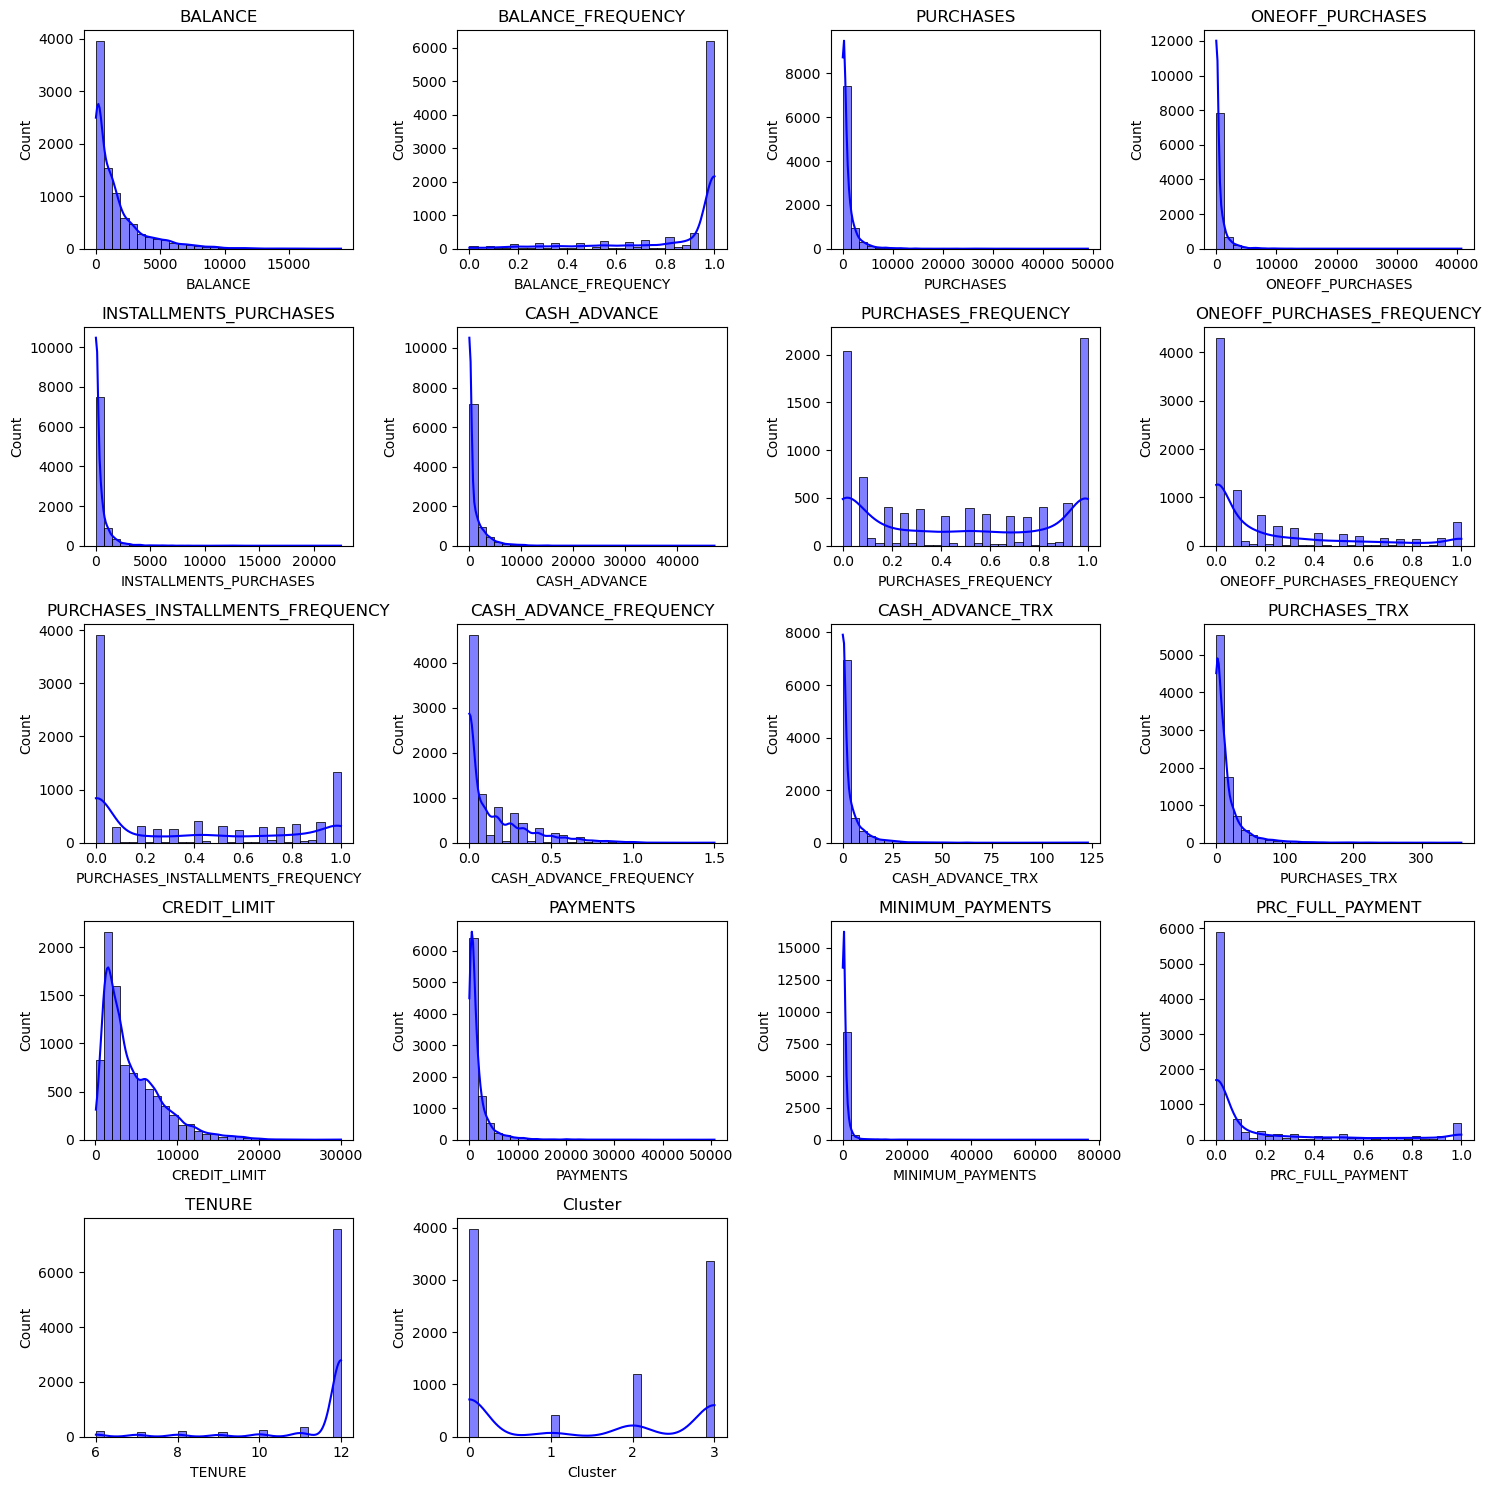

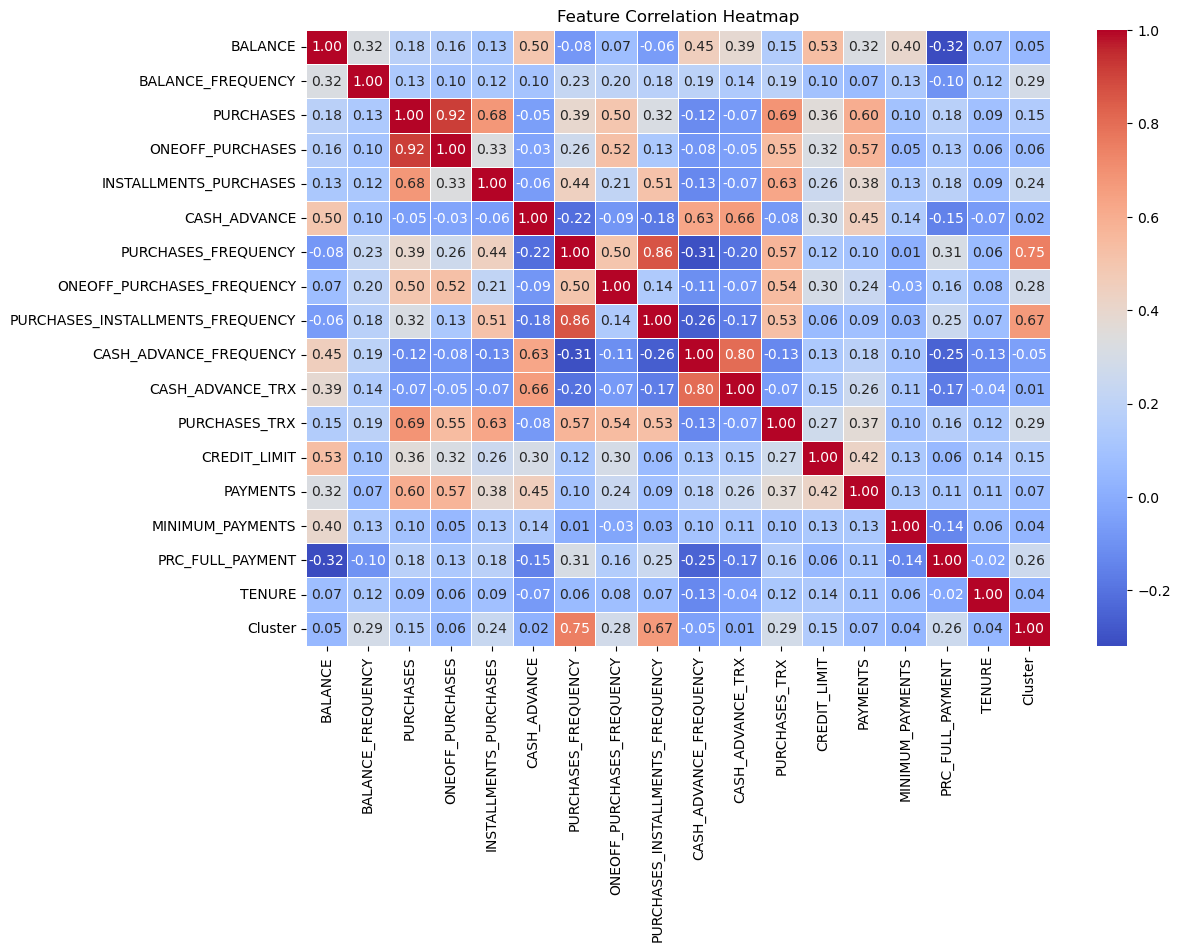

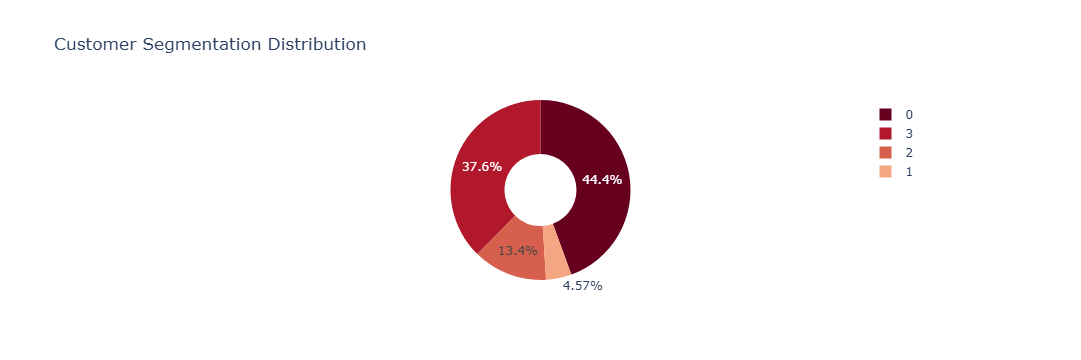

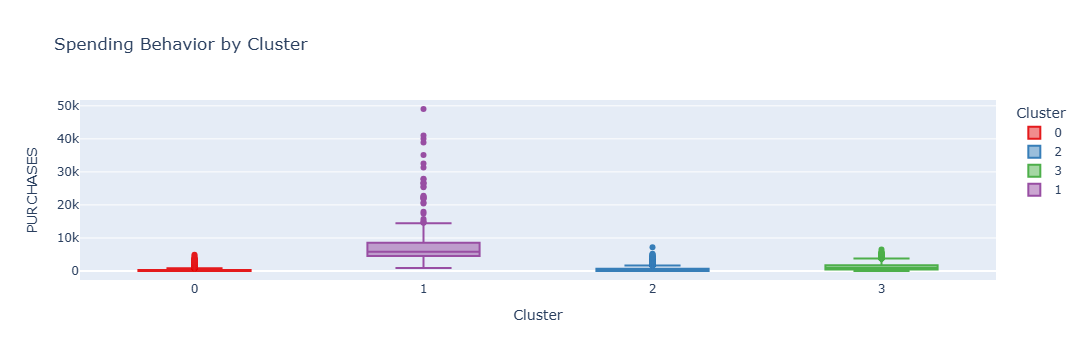

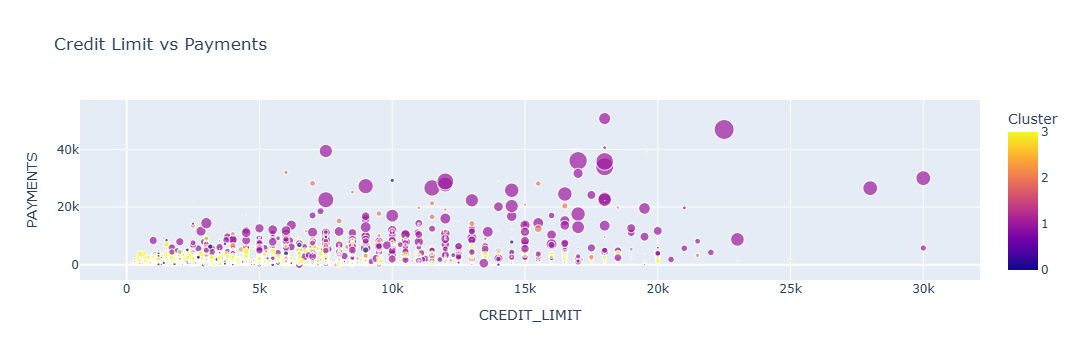

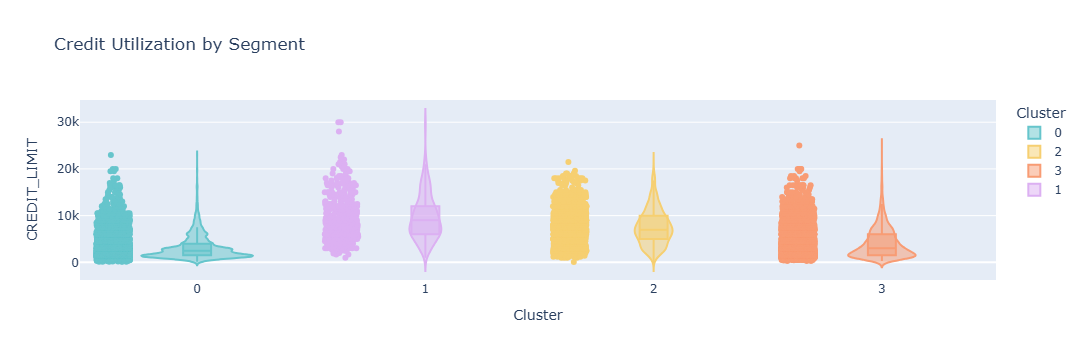

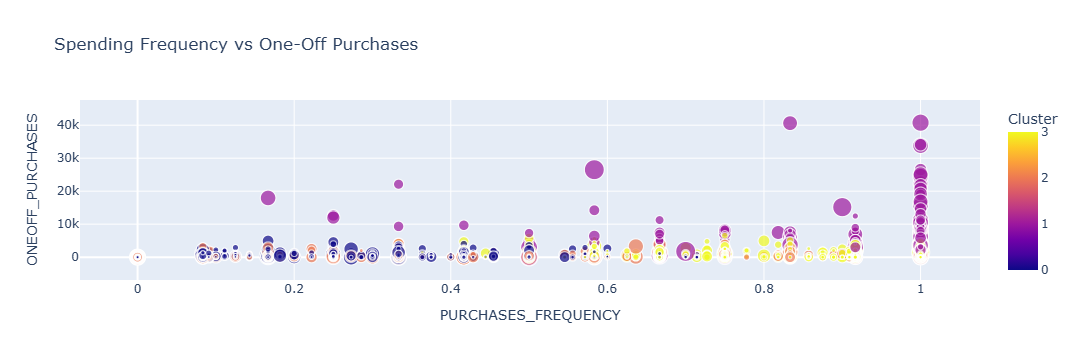

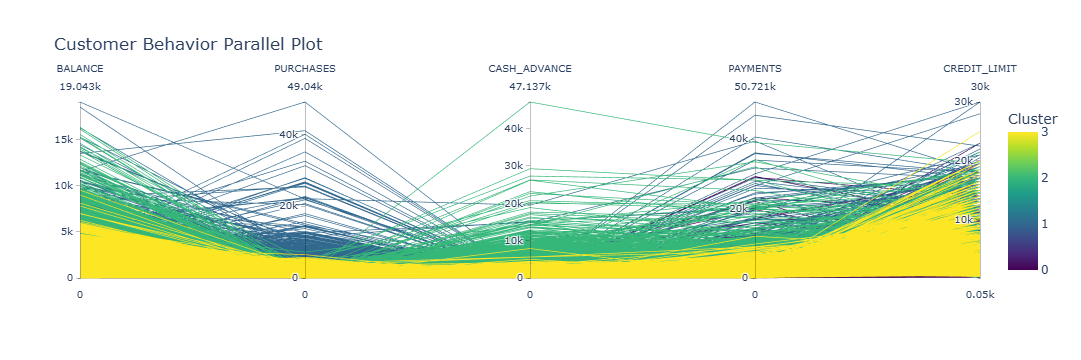

EDA Completed Successfully!


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

# Load dataset
df = pd.read_csv("Customer_Segmentation_with_Insights.csv")

# Drop non-numeric columns before correlation analysis
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# Display basic information
print("Basic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Handling missing values - Apply median only to numeric columns
df.fillna(df_numeric.median(), inplace=True)

# Distribution of numerical features
num_cols = df_numeric.columns
n_cols = 4  # Fix columns to 4
n_rows = math.ceil(len(num_cols) / n_cols)  # Adjust rows dynamically

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Flatten axes to handle subplots dynamically

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(col)

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Cluster Distribution
fig = px.pie(df, names='Cluster', title='Customer Segmentation Distribution', hole=0.4, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Spending Behavior per Segment
fig = px.box(df, x='Cluster', y='PURCHASES', title='Spending Behavior by Cluster', color='Cluster',
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

# Credit Limit vs Payments
fig = px.scatter(df, x='CREDIT_LIMIT', y='PAYMENTS', color='Cluster', size='PURCHASES', title='Credit Limit vs Payments')
fig.show()

# Credit Utilization Analysis
fig = px.violin(df, x='Cluster', y='CREDIT_LIMIT', box=True, points='all', title='Credit Utilization by Segment',
                color='Cluster', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

# Spending Frequency vs One-off Purchases
fig = px.scatter(df, x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES', color='Cluster',
                 size='CREDIT_LIMIT', title='Spending Frequency vs One-Off Purchases',
                 color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

# Customer Behavior Analysis with Parallel Coordinates
fig = px.parallel_coordinates(df, dimensions=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT'],
                              color='Cluster', title='Customer Behavior Parallel Plot',
                              color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

print("EDA Completed Successfully!")
